In [1]:
import pandas as pd

data = pd.read_csv('rounded_dataset.csv')
print(data.head())

         Date   Open   High    Low  Close  Adj Close     Volume Company  \
0  31-05-2004  28.37  28.72  27.36  28.14      16.31  219408400   Intel   
1  07-06-2004  28.44  29.01  28.23  28.64      16.60  174396600   Intel   
2  14-06-2004  28.23  28.65  27.34  27.64      16.02  210249800   Intel   
3  21-06-2004  27.85  28.60  27.13  27.78      16.10  266090100   Intel   
4  28-06-2004  27.92  27.97  26.25  26.33      15.26  270454300   Intel   

   P/E Ratio  
0      31.79  
1      31.79  
2      31.79  
3      31.79  
4      31.79  


In [2]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Company      0
P/E Ratio    0
dtype: int64

In [3]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume,P/E Ratio
count,2096.000000,2096.000000,2096.000000,2096.000000,2096.000000,2.096000e+03,2096.000000
mean,31.425334,32.737552,30.232099,31.495592,28.335033,2.027929e+08,130.165000
std,30.091969,31.648649,28.692795,30.240375,30.542827,1.297266e+08,98.398476
min,1.670000,1.830000,1.610000,1.670000,1.670000,2.241570e+07,31.790000
25%,12.302500,13.047500,11.772500,12.272500,10.522500,1.031375e+08,31.790000
50%,23.325000,24.105000,22.650000,23.370000,16.370000,1.730181e+08,130.165000
75%,37.667500,38.647500,36.520000,37.905000,35.905000,2.719625e+08,228.540000
max,205.160000,227.300000,199.150000,207.390000,207.390000,1.041956e+09,228.540000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2096 entries, 0 to 2095
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2096 non-null   object 
 1   Open       2096 non-null   float64
 2   High       2096 non-null   float64
 3   Low        2096 non-null   float64
 4   Close      2096 non-null   float64
 5   Adj Close  2096 non-null   float64
 6   Volume     2096 non-null   int64  
 7   Company    2096 non-null   object 
 8   P/E Ratio  2096 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 147.5+ KB


In [5]:
data['Date']=pd.to_datetime(data['Date'],format='%d-%m-%Y')
#format='%d-%m-%Y')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2096 entries, 0 to 2095
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2096 non-null   datetime64[ns]
 1   Open       2096 non-null   float64       
 2   High       2096 non-null   float64       
 3   Low        2096 non-null   float64       
 4   Close      2096 non-null   float64       
 5   Adj Close  2096 non-null   float64       
 6   Volume     2096 non-null   int64         
 7   Company    2096 non-null   object        
 8   P/E Ratio  2096 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 147.5+ KB


In [7]:
intel_data=data[data['Company']=='Intel']
amd_data = data[data['Company']=='AMD']

In [8]:
intel_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Company,P/E Ratio
0,2004-05-31,28.37,28.72,27.36,28.14,16.31,219408400,Intel,31.79
1,2004-06-07,28.44,29.01,28.23,28.64,16.60,174396600,Intel,31.79
2,2004-06-14,28.23,28.65,27.34,27.64,16.02,210249800,Intel,31.79
3,2004-06-21,27.85,28.60,27.13,27.78,16.10,266090100,Intel,31.79
4,2004-06-28,27.92,27.97,26.25,26.33,15.26,270454300,Intel,31.79


In [9]:
amd_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Company,P/E Ratio
1048,2004-05-31,15.50,15.60,14.58,15.12,15.12,29425300,AMD,228.54
1049,2004-06-07,15.30,16.35,15.29,15.75,15.75,43107800,AMD,228.54
1050,2004-06-14,15.75,15.75,14.35,14.88,14.88,33948100,AMD,228.54
1051,2004-06-21,14.94,15.80,14.06,15.50,15.50,62235900,AMD,228.54
1052,2004-06-28,15.72,16.00,15.09,15.27,15.27,49300100,AMD,228.54


In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
intel_data_scaled=scaler.fit_transform(intel_data[['Close']])
amd_data_scaled=scaler.fit_transform(amd_data[['Close']])

In [11]:
intel_data_scaled[:6]

array([[0.28059222],
       [0.28951124],
       [0.27167321],
       [0.27417053],
       [0.24830539],
       [0.25258651]])

In [12]:
import numpy as np
def create_lstm_data(data,time_steps=50):
    X,y=[],[]
    for i in range(len(data)-time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X),np.array(y)

In [47]:
intel_y

array([[0.24866215],
       [0.2672137 ],
       [0.26614342],
       [0.25990011],
       [0.26239743],
       [0.24420264],
       [0.24616482],
       [0.26525152],
       [0.28344631],
       [0.25579736],
       [0.26275419],
       [0.25615412],
       [0.24794863],
       [0.23617553],
       [0.2318944 ],
       [0.22957545],
       [0.22904031],
       [0.22119158],
       [0.21352123],
       [0.2183375 ],
       [0.20353193],
       [0.19300749],
       [0.19158045],
       [0.1947913 ],
       [0.2065644 ],
       [0.22689975],
       [0.22993222],
       [0.25686764],
       [0.26792722],
       [0.24384588],
       [0.24919729],
       [0.2418837 ],
       [0.22386729],
       [0.24794863],
       [0.23867285],
       [0.16678559],
       [0.16518016],
       [0.1485908 ],
       [0.15840171],
       [0.14627185],
       [0.14181234],
       [0.14109882],
       [0.13271495],
       [0.12718516],
       [0.12825544],
       [0.12575812],
       [0.12183375],
       [0.125

In [14]:
intel_x,intel_y=create_lstm_data(intel_data_scaled,time_steps=50)
amd_x,amd_y=create_lstm_data(amd_data_scaled,time_steps=50)

intel_x.shape
#intel_y.shape

(998, 50, 1)

In [24]:
from keras.optimizers import Adam

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout
from keras.callbacks import EarlyStopping

# Modify the LSTM model
def build_lstm_model(input_shape):
    model = Sequential([
    LSTM(100, return_sequences=True, input_shape=input_shape),
    Dropout(0.2),
    LSTM(50, return_sequences=True),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(50, activation='relu'),
    Dense(1)
])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

# Add Early Stopping
#early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)



In [28]:
input_shape = (intel_x.shape[1], intel_x.shape[2])

intel_model=build_lstm_model(input_shape)
amd_model=build_lstm_model((amd_x.shape[1],amd_x.shape[2]))
intel_model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_24 (LSTM)                  │ (None, 50, 100)        │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 50, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_25 (LSTM)                  │ (None, 50, 50)         │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 50, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_26 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,801 (366.41 KB)

 Trainable params: 93,801 (366.41 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
from sklearn.model_selection import train_test_split

intel_x_train,intel_x_test,intel_y_train,intel_y_test=train_test_split(intel_x,intel_y,test_size=0.2,random_state=42)
amd_x_train,amd_x_test,amd_y_train,amd_y_test = train_test_split(amd_x,amd_y,test_size=0.2,random_state=42)



In [32]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',  
    patience=10,        
    restore_best_weights=True  
)


intel_history = intel_model.fit(
    intel_x_train,
    intel_y_train,
    validation_data=(intel_x_test, intel_y_test),
    epochs=100,
    batch_size=34,
    verbose=1,
    callbacks=[early_stopping]  
)


amd_history = amd_model.fit(
    amd_x_train,
    amd_y_train,
    validation_data=(amd_x_test, amd_y_test),
    epochs=100,
    batch_size=34,
    verbose=1,
    callbacks=[early_stopping] 
)


Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 104ms/step - loss: 0.0543 - val_loss: 0.0069
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - loss: 0.0096 - val_loss: 0.0047
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.0072 - val_loss: 0.0043
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - loss: 0.0059 - val_loss: 0.0039
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 0.0060 - val_loss: 0.0038
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.0053 - val_loss: 0.0035
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.0047 - val_loss: 0.0032
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - loss: 0.0047 - val_loss: 0.0034
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 0.0046 - val_loss: 0.0030
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.0043 - val_loss: 0.0040
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - loss: 0.0048 - val_loss: 0.0045
Epoch 12/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/ste

In [33]:
intel_loss = intel_model.evaluate(intel_x_test, intel_y_test, verbose=0)
print(f"Intel Model Loss: {intel_loss}")
amd_loss = amd_model.evaluate(amd_x_test, amd_y_test, verbose=0)
print(f"AMD Model Loss: {amd_loss}")

Intel Model Loss: 0.001052733277902007
AMD Model Loss: 0.00041342765325680375


In [34]:
# Predictions for Intel
intel_predictions = intel_model.predict(intel_x_test)

# Predictions for AMD
amd_predictions = amd_model.predict(amd_x_test)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 145ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step


In [35]:

intel_predictions[:10]

array([[0.23466477],
       [0.8316951 ],
       [0.06199677],
       [0.1329109 ],
       [0.6476963 ],
       [0.34491384],
       [0.7237772 ],
       [0.37131485],
       [0.18328574],
       [0.71627986]], dtype=float32)

In [36]:
intel_y[:10]

array([[0.24866215],
       [0.2672137 ],
       [0.26614342],
       [0.25990011],
       [0.26239743],
       [0.24420264],
       [0.24616482],
       [0.26525152],
       [0.28344631],
       [0.25579736]])

In [37]:
from sklearn.metrics import mean_absolute_error

In [38]:

intel_predictions = scaler.inverse_transform(intel_predictions.reshape(-1,1))
intel_y_test = scaler.inverse_transform(intel_y_test.reshape(-1, 1))


amd_predictions = scaler.inverse_transform(amd_predictions.reshape(-1,1))
amd_y_test = scaler.inverse_transform(amd_y_test.reshape(-1, 1))


In [39]:
print(intel_predictions.shape)
print(intel_y_test.shape)

(200, 1)
(200, 1)


In [40]:
intel_predictions=intel_predictions[:200]

In [41]:
from sklearn.metrics import r2_score
intel_r2=r2_score(intel_y_test,intel_predictions)
print(intel_r2)

0.9803609172475248


In [42]:
from sklearn.metrics import mean_absolute_error

acc = mean_absolute_error(intel_y_test,intel_predictions)
print(acc)

4.63930786553596


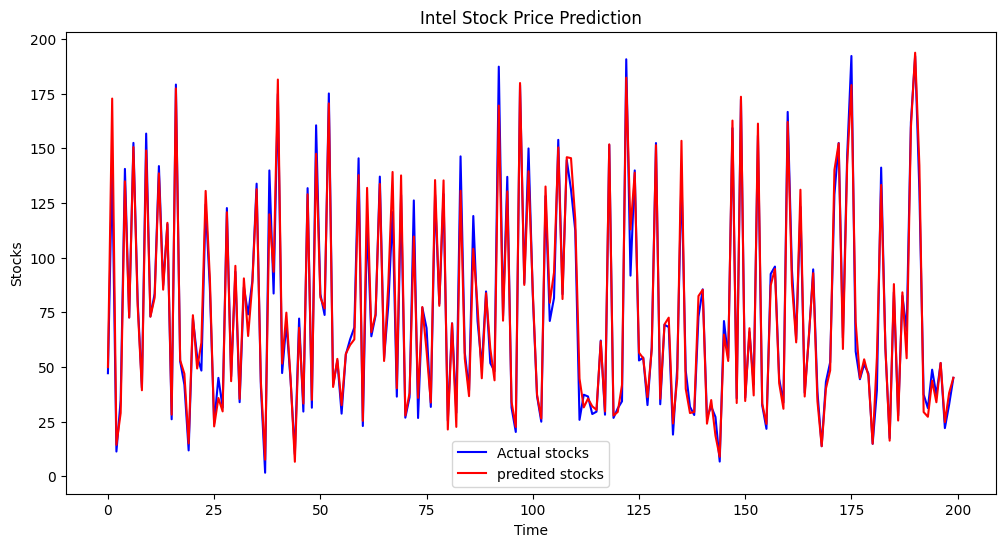

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(intel_y_test,label='Actual stocks',color='blue')
plt.plot(intel_predictions,label='predited stocks',color='red')
plt.title('Intel Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stocks')
plt.legend()
plt.show()

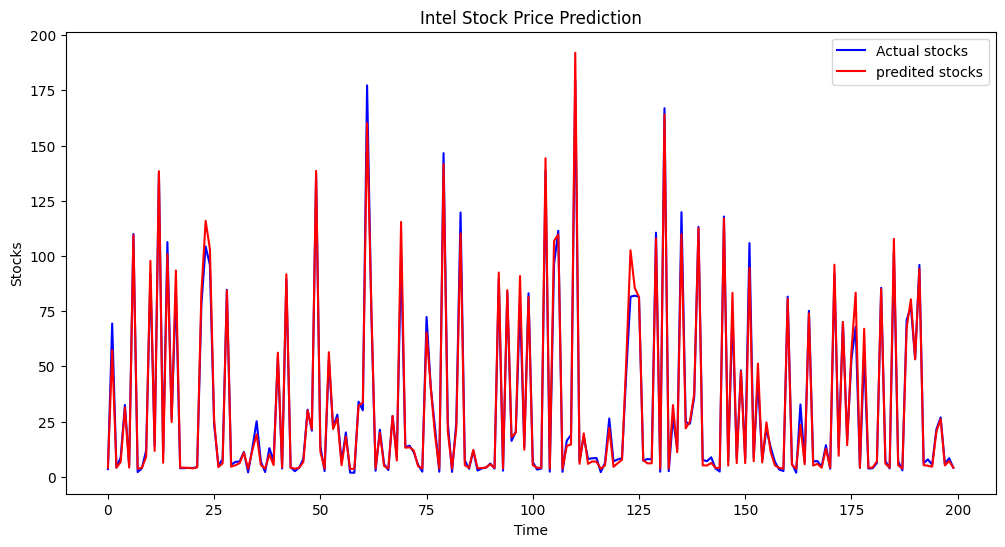

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(amd_y_test,label='Actual stocks',color='blue')
plt.plot(amd_predictions,label='predited stocks',color='red')
plt.title('Intel Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stocks')
plt.legend()
plt.show()

In [45]:
acc = mean_absolute_error(amd_y_test,amd_predictions)
print(acc)

2.5391618621826173


In [46]:
intel_model.save('intel_stock_model.h5')
amd_model.save('amd_stock_model.h5')
